In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Estrazione dati da pagine web

Una funzionalità molto interessante di Pandas è quella che ci permette di estrarre facilmente dati da pagine web con pochissime righe di codice.

Su Wikipedia troviamo l'elenco dei comuni italiani con più di 50 000 abitanti aggiornati al 31 dicembre 2021

*N.B.
Occorre avere installato lxml, html5lib, bs4*

In [2]:
url_popolazione = "https://it.wikipedia.org/wiki/Comuni_d%27Italia_per_popolazione"
url_superficie = "https://it.wikipedia.org/wiki/Primi_100_comuni_italiani_per_superficie"

popolazione = pd.read_html(url_popolazione, attrs={"class":"wikitable"},header=0)[0]
popolazione.head(10)

,N°,Comune,Regione,Provincia / Città metropolitana,Abitanti
0,1,Roma,Lazio,Roma,2 758 454
1,2,Milano,Lombardia,Milano,1 371 606
2,3,Napoli,Campania,Napoli,912 954
3,4,Torino,Piemonte,Torino,846 067
4,5,Palermo,Sicilia,Palermo,628 883
5,6,Genova,Liguria,Genova,560 155
6,7,Bologna,Emilia-Romagna,Bologna[2],392 593
7,8,Firenze,Toscana,Firenze,367 051
8,9,Bari,Puglia,Bari,316 113
9,10,Catania,Sicilia,Catania,297 761


Riordiniamo le città per regione e quindi per provincia

In [3]:
popolazione = popolazione.sort_values(by=['Regione', 'Provincia / Città metropolitana'])
popolazione.head(10)

,N°,Comune,Regione,Provincia / Città metropolitana,Abitanti
82,83,L'Aquila,Abruzzo,L'Aquila,69 918
35,36,Pescara,Abruzzo,Pescara,119 305
123,124,Montesilvano,Abruzzo,Pescara,53 166
122,123,Teramo,Abruzzo,Teramo,53 199
98,99,Matera,Basilicata,Matera,60 286
89,90,Potenza,Basilicata,Potenza,64 970
58,59,Catanzaro,Calabria,Catanzaro,85 390
85,86,Lamezia Terme,Calabria,Catanzaro,67 547
70,71,Corigliano-Rossano,Calabria,Cosenza,74 765
87,88,Cosenza,Calabria,Cosenza,65 209


Sarebbe meglio riordinare le colonne mettendo al primo posto la regione e al secondo la provincia. La colonna N° non ci serve quindi la rimuoviamo.

Rinominiamo poi la colonna 'Provincia / Città metropolitana' semplicemente in "Provincia"

In [4]:
cols = ['Regione', 'Provincia / Città metropolitana', 'Comune', 'Abitanti']
popolazione = popolazione[cols]

popolazione.rename(columns = {'Provincia / Città metropolitana':'Provincia'}, inplace = True)
popolazione.head(10)

,Regione,Provincia,Comune,Abitanti
82,Abruzzo,L'Aquila,L'Aquila,69 918
35,Abruzzo,Pescara,Pescara,119 305
123,Abruzzo,Pescara,Montesilvano,53 166
122,Abruzzo,Teramo,Teramo,53 199
98,Basilicata,Matera,Matera,60 286
89,Basilicata,Potenza,Potenza,64 970
58,Calabria,Catanzaro,Catanzaro,85 390
85,Calabria,Catanzaro,Lamezia Terme,67 547
70,Calabria,Cosenza,Corigliano-Rossano,74 765
87,Calabria,Cosenza,Cosenza,65 209


### Contare il numero di comuni per ciascuna regione

In [5]:
popolazione.groupby(['Regione']).size().reset_index(name='Comuni')

,Regione,Comuni
0,Abruzzo,4
1,Basilicata,2
2,Calabria,6
3,Campania,18
4,Emilia-Romagna,13
5,Friuli-Venezia Giulia,3
6,Lazio,11
7,Liguria,4
8,Lombardia,14
9,Marche,3


### Contare il numero di comuni per ciascuna Regione e provincia ordinandoli per numero di comuni

In [6]:
popolazione.groupby(['Regione','Provincia']) \
    .size() \
    .reset_index(name='N° comuni') \
    .sort_values(by=['N° comuni'],ascending=False) \
    .head(10)

,Regione,Provincia,N° comuni
12,Campania,Napoli,11
28,Lazio,Roma,8
50,Puglia,Barletta-Andria-Trani,4
49,Puglia,Bari,4
38,Lombardia,Milano,4
13,Campania,Salerno,3
62,Sicilia,Ragusa,3
52,Puglia,Foggia,3
64,Sicilia,Trapani,3
41,Lombardia,Varese,3


### Contare gli abitanti di ciascuna regione

Dobbiamo semplicemente applicare la funzione sum(), ma proviamo ad eseguire il prossimo frammento di codice

In [7]:
popolazione.groupby(['Regione'])['Abitanti'].sum()

Regione
Abruzzo                                          69 918119 30553 16653 199
Basilicata                                                    60 28664 970
Calabria                             85 39067 54774 76565 20959 824171 546
Campania                 52 97457 45673 61451 115912 954123 03180 62478...
Emilia-Romagna           70 203392 593131 066116 78796 167185 62872 511...
Friuli-Venezia Giulia                                  51 719200 45497 743
Lazio                    127 07773 4742 758 45488 38476 48161 39153 988...
Liguria                                          560 15552 22192 18858 261
Lombardia                120 226196 72783 62671 3431 371 60679 60273 48...
Marche                                                  98 58095 73959 895
Piemonte                            91 05073 95255 843101 709846 06756 389
Puglia                   316 11369 63757 48652 09397 05492 41355 17154 ...
Sardegna                                        148 69767 694121 43560 577
Sicilia          

Il risultato non è quello sperato. Vengono infatti concatenate tutte le stringhe che rappresentano gli abitanti di ciascuna regione. Perchè questo?

Proviamo a vedere come è strutturato il nostro dataframe

In [8]:
popolazione.dtypes

Regione      object
Provincia    object
Comune       object
Abitanti     object
dtype: object

Il campo abitanti è di tipo object, quindi non possiamo usarlo per fare calcoli matematici. 

Bisogna convertire quell'oggetto in un numero intero.

ATTENZIONE qua c'e' un problema non banale. Nella stringa che mostra il numero degli abitanti lo spazio non è un semplice spazio ma è il carattere `xa0` che è un "non-breaking Latin1 (ISO 8859-1) space". Questo carattere va eliminato prima di poter procedere con la conversione.

Per approfondire: https://pbpython.com/pandas-html-table.html

In [9]:
from unicodedata import normalize

def clean_normalize_whitespace(x):
    if isinstance(x, str):
        return normalize('NFKC', x).replace(' ','')
    else:
        return x

popolazione['Abitanti'] = popolazione['Abitanti'].map(clean_normalize_whitespace)
popolazione['Abitanti'] = pd.to_numeric(popolazione['Abitanti'])

abitanti_regione = popolazione.groupby(['Regione'])['Abitanti'] \
    .sum() \
    .reset_index() \
    .sort_values(by = ['Abitanti'], ascending=[False]) \

abitanti_regione.head(12)

,Regione,Abitanti
6,Lazio,3461069
8,Lombardia,2526169
3,Campania,2079976
13,Sicilia,1935484
4,Emilia-Romagna,1898304
14,Toscana,1459667
11,Puglia,1417282
10,Piemonte,1225010
17,Veneto,915601
7,Liguria,762825


In questo modo otteniamo il risultato voluto

# Grafici

Proviamo ora ad usare i dati appena calcolati per disegnare un grafico con il numero di abitanti per ciascuna regione

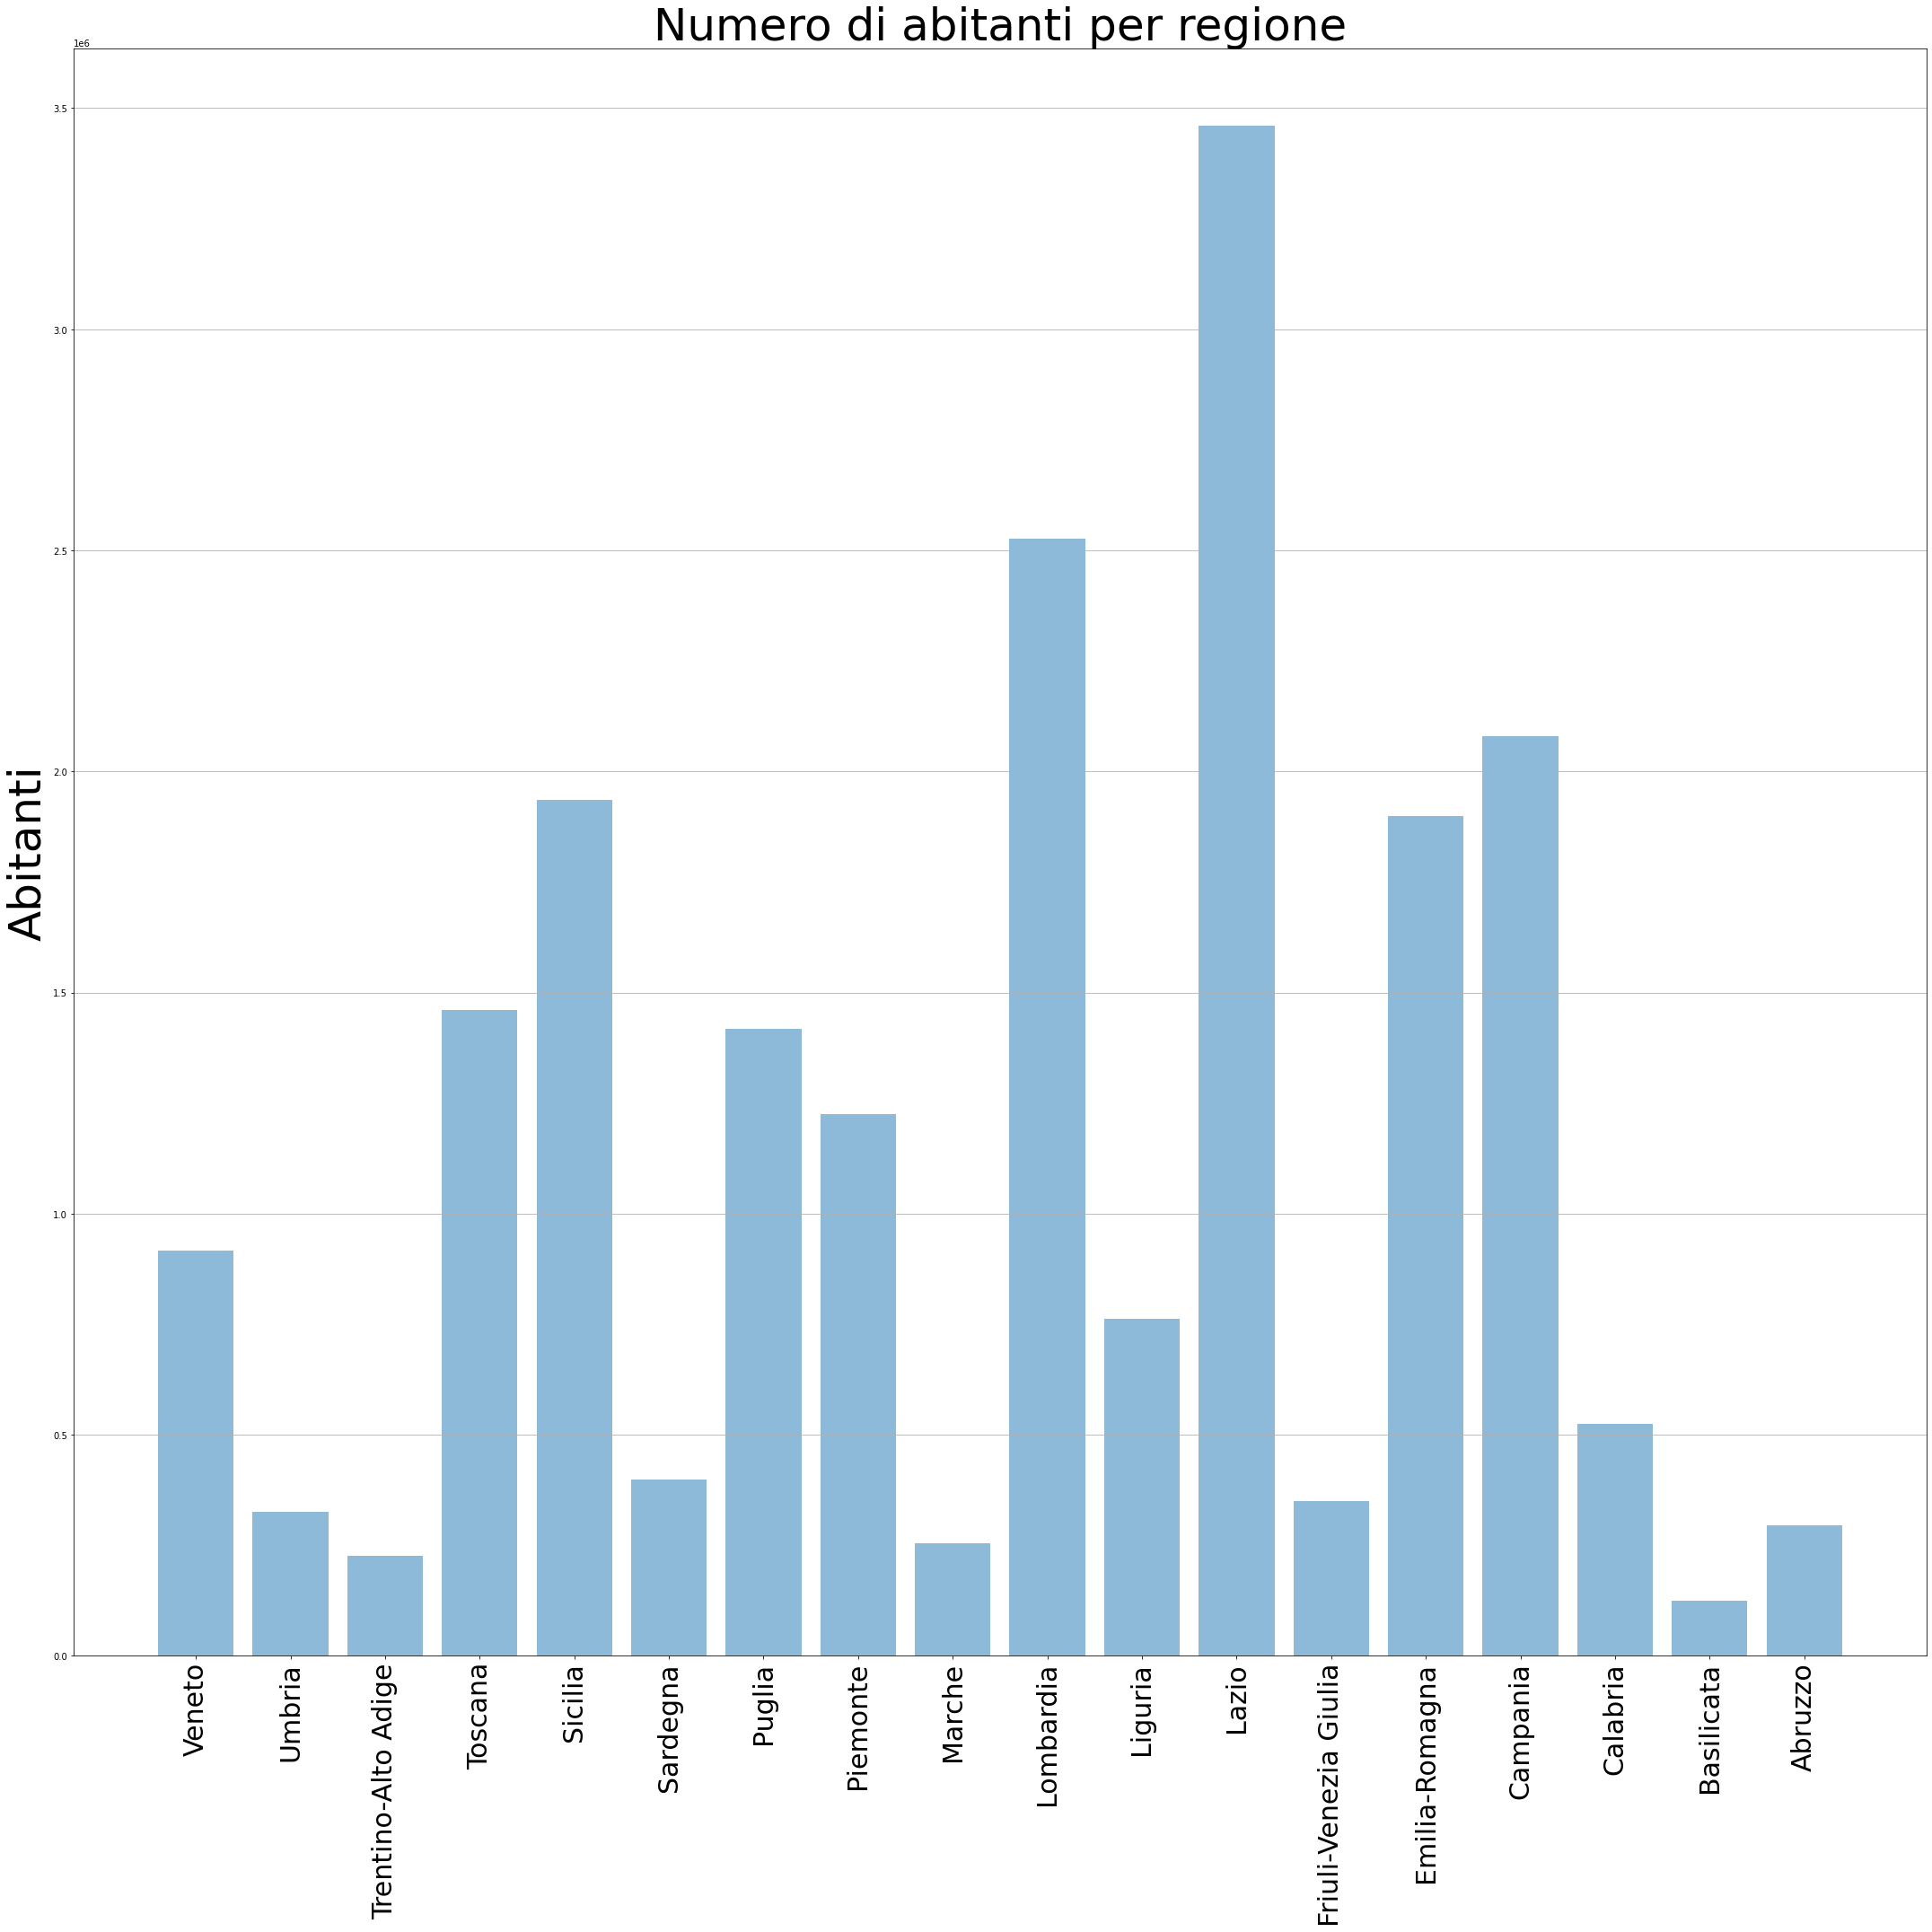

In [19]:
ar = abitanti_regione.sort_values(by = ['Regione'], ascending=[False])

fig, ax = plt.subplots(figsize=(30,30))

labels = ar['Regione']
x_pos = np.arange(len(labels))
data = ar['Abitanti']

ax.bar(x_pos, data, align='center', alpha=0.5)

ax.set_ylabel('Abitanti', fontsize=50, rotation=90)

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=30, rotation=90)

ax.set_title('Numero di abitanti per regione', fontsize=50)

ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

# Esercizio aggiuntivo

Scaricare le tabelle delle città per ciascuna regione dalla pagina
https://it.wikipedia.org/wiki/Titolo_di_citt%C3%A0_in_Italia



In [11]:
url = 'https://it.wikipedia.org/wiki/Titolo_di_citt%C3%A0_in_Italia'
tabelle = pd.read_html(url, attrs={"class":"wikitable"},header=0)
len(tabelle)

20

In [21]:
# Analisi tabella Primi_100_comuni_italiani_per_superficie
sup = pd.read_html(url_superficie, attrs={"class":"wikitable"},header=0)[0]
sup.head()

,Pos.,Comune,Regione,Provincia,Superficie (km²)
0,1,Roma,Lazio,Roma,128736
1,2,Ravenna,Emilia-Romagna,Ravenna,65382
2,3,Cerignola,Puglia,Foggia,59393
3,4,Noto,Sicilia,Siracusa,55499
4,5,Sassari,Sardegna,Sassari,54704
